# RAMP AQ Data

RAMP AQ data from the WFRT rooftop is read in with the function below.

Today is 2026-02-02.


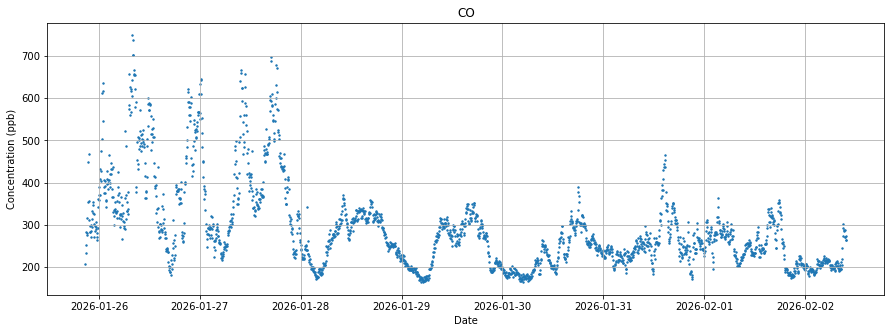

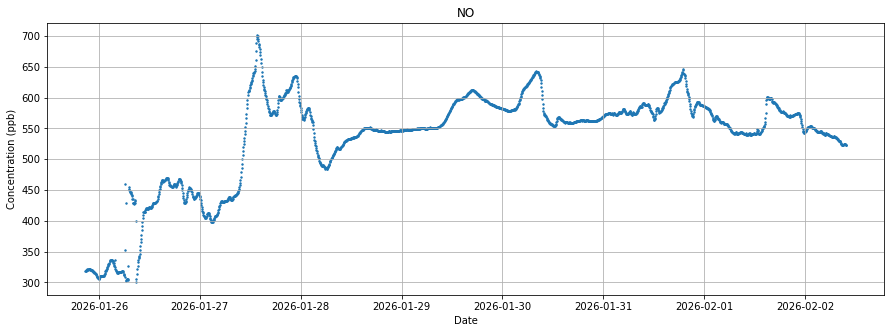

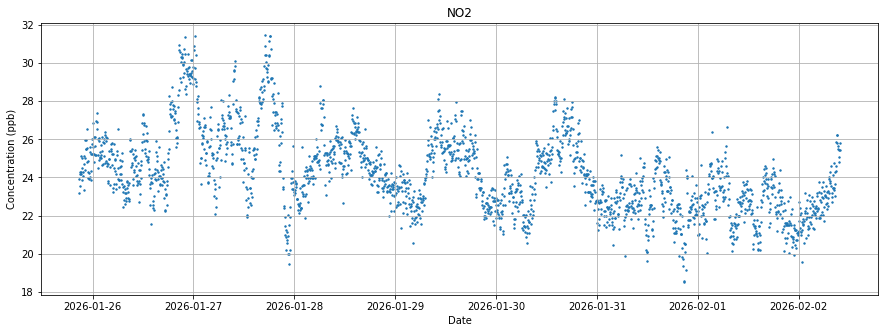

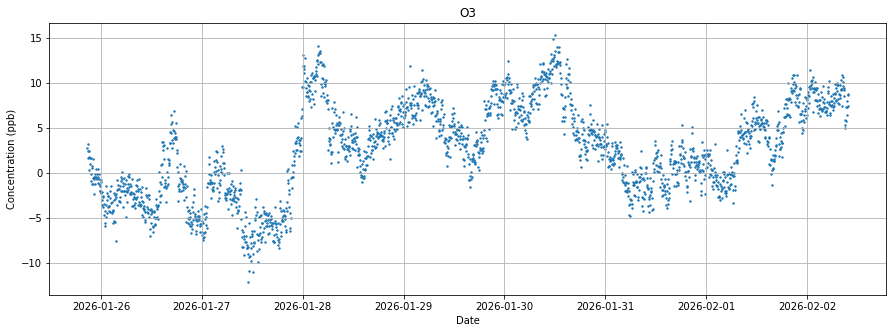

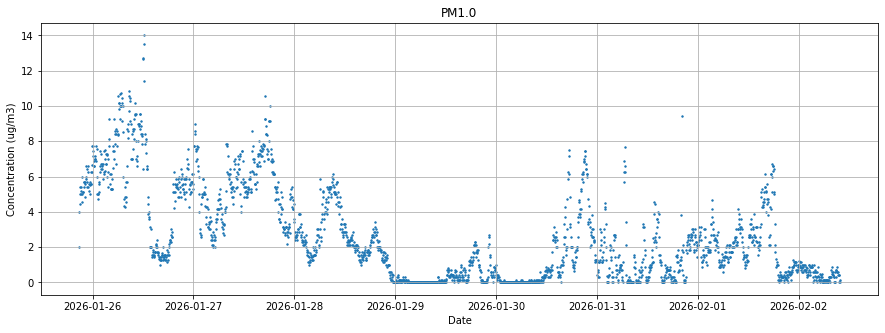

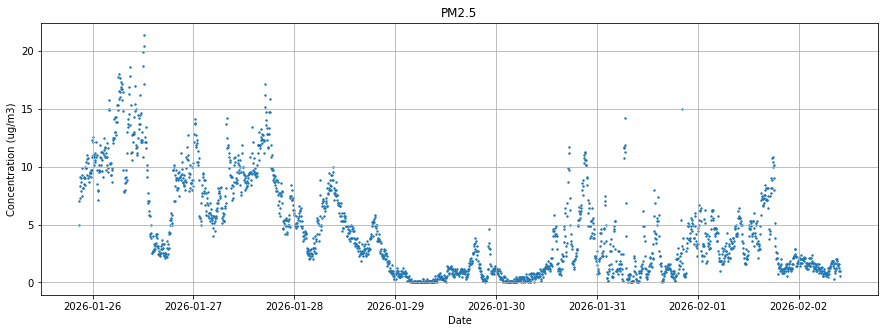

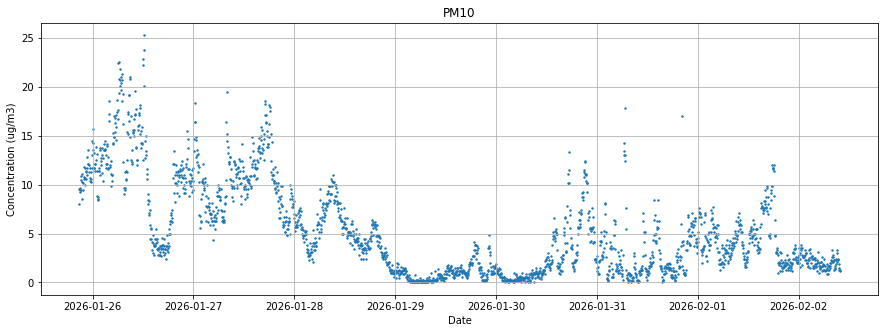

In [1]:
from func import run

run()